In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-players/all_seasons.csv


# Questions which are ansered in this EDA
#### 1. Total No. of players played since 1996. 
#### 2. What college do most NBA players come from?
#### 3. Coutry wise player list
#### 4. Tallest and shortest player and Avg height of NBA player?¶
#### 5. Does draft round impacts avg game played by a player?
#### 6. Teams with  best and worst team rating ?
#### 7. Overall best offensive players ?
#### 8. Best defensive player based on rebounding stats.
#### 9. Trend in points/assist/rebounds per season over the seasons. 

In [2]:
df = pd.read_csv('/kaggle/input/nba-players/all_seasons.csv')
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


# Cleaning data

In [3]:
#check for null values 
df.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

No null values

In [4]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [5]:
nba = df.copy()

In [6]:
#Droped extra columns
nba.drop('Unnamed: 0' , axis = 'columns' , inplace = True)

In [7]:
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [8]:
nba.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,13,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,6,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22
12304,Micah Potter,DET,24.0,208.28,112.490816,Wisconsin,USA,Undrafted,Undrafted,Undrafted,...,4.0,3.0,0.0,-56.4,0.095,0.125,0.148,0.505,0.000,2021-22


Player information is from  season 1996-97 to 2021-22

In [9]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12305 non-null  object 
 1   team_abbreviation  12305 non-null  object 
 2   age                12305 non-null  float64
 3   player_height      12305 non-null  float64
 4   player_weight      12305 non-null  float64
 5   college            12305 non-null  object 
 6   country            12305 non-null  object 
 7   draft_year         12305 non-null  object 
 8   draft_round        12305 non-null  object 
 9   draft_number       12305 non-null  object 
 10  gp                 12305 non-null  int64  
 11  pts                12305 non-null  float64
 12  reb                12305 non-null  float64
 13  ast                12305 non-null  float64
 14  net_rating         12305 non-null  float64
 15  oreb_pct           12305 non-null  float64
 16  dreb_pct           123

draft_year, draft_round , draft_number have datatype as object which i guess will have to convert to int later./
Players who do not get drafted  have undrafted above three columns and thats why i have to consider them as categorical data


# Total no.  of players played/playing since 1996 ?

In [10]:
nba['player_name'].nunique()

2463

Since 1996 there have been only **2463** unique players in the NBA

**Before coming to NBA It starts from collage basketball. That why need to look at top collage that produce most NBA players**

# From which college more NBA player are produced?

In [11]:
nba.loc[nba['college'] == 'None'].groupby('country').nunique()

,player_name,team_abbreviation,age,player_height,player_weight,college,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
country,,,,,,,,,,,,,,,,,,,,
Argentina,12,22,20,8,15,1,5,3,5,33,51,42,36,58,45,58,55,52,53,19
Australia,8,10,15,6,10,1,4,3,4,15,18,17,19,20,13,19,19,19,20,8
Bosnia,2,4,7,2,5,1,2,2,2,7,7,7,6,7,7,7,7,7,7,5
Bosnia & Herzegovina,1,2,3,2,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3
Bosnia and Herzegovina,3,3,8,3,6,1,3,2,3,8,8,7,8,8,7,7,8,8,8,5
Brazil,11,19,19,8,23,1,8,3,8,50,63,51,31,69,61,68,62,67,71,20
Cabo Verde,1,2,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2
China,4,7,8,4,7,1,4,3,4,15,18,17,11,18,15,17,18,18,16,12
Congo,1,2,2,2,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2


In [12]:
nba_college = nba.groupby('college').nunique().sort_values( 'player_name',ascending = False).iloc[0:20]

According to above output of code, I can see that Kentucky, Duke and UCLA are colleges with most of players going in NBA.
But Also I can see that 352 players have no college information  or they did not attended college in USA 

In [13]:
nba_college.drop('None',axis=0 , inplace = True)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

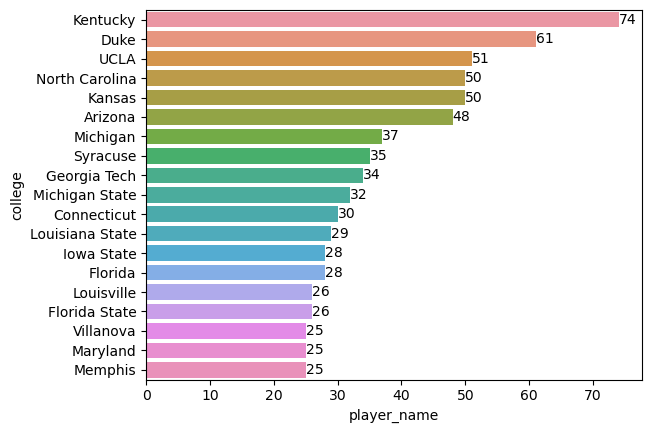

In [15]:

ax = sns.barplot(nba_college, y= nba_college.index,  x= 'player_name' )
for i in ax.containers:
    ax.bar_label(i,)


# Country wise player list?

### Top 5 country with players playing in nba 

In [16]:
nba_country = nba.groupby('country').nunique().sort_values( 'player_name',ascending = False).iloc[0:5]

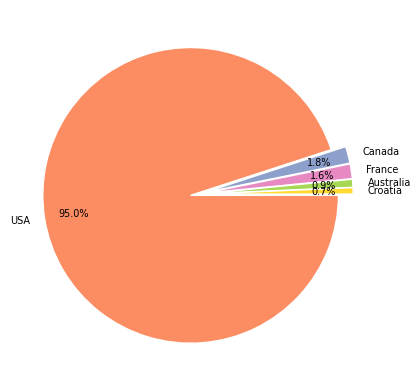

In [17]:
#ax = plt.pie(x = nba_country['player_name'] , labels=nba_country.index,autopct='%0.2f'  )
cmap = plt.get_cmap("Set2")
colors = cmap(np.array([1, 2, 3, 4, 5, 6, 7]))
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(nba_country['player_name'],
        labels=nba_country.index,
        explode=explode,
        colors=colors,
        counterclock=False,
        shadow=False,
        wedgeprops={'edgecolor': 'white'},
        textprops={'fontsize': 7},
        pctdistance=0.8,
        autopct='%1.1f%%')

plt.show()

# Tallest and shortest player and Avg height of NBA player?

### Tallest Player

In [18]:
nba[['player_name', 'player_height']].sort_values('player_height').drop_duplicates().tail(3)

,player_name,player_height
4797,Yao Ming,228.60
12101,Tacko Fall,228.60
92,Gheorghe Muresan,231.14


**From the nba conversations i knew that shaq was most dominant player on the rim, When i look at the height data i was surprised that there are more than 80 who are tallest than shaq**

### Shortest Player

In [19]:
nba[['player_name', 'player_height']].sort_values('player_height').drop_duplicates().head(3)

,player_name,player_height
1727,Muggsy Bogues,160.02
1773,Earl Boykins,165.10
642,Spud Webb,167.64


### Average heights of NBA Player

In [20]:
nba[['player_name', 'player_height']].sort_values('player_height').drop_duplicates().describe()

,player_height
count,2993.000000
mean,200.145352
std,9.002809
min,160.020000
25%,193.040000
50%,200.660000
75%,205.740000
max,231.140000


**According to data average height of NBA players is 200cm i.e 6.5ft
<br>Also It is surprising that 6.3 ft is only beating 25% players**

# Does draft round impacts avg game played by a player?

In [21]:
pd.set_option('display.max_columns', 500)
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


Need to calculate avg games per season

In [22]:
draft = nba.groupby(['draft_round']).mean().sort_values('gp' , ascending = False)

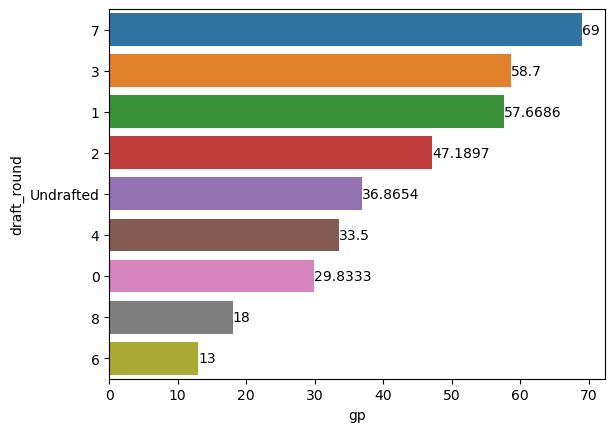

In [23]:
ax = sns.barplot(draft, y= draft.index,  x= 'gp' )
for i in ax.containers:
    ax.bar_label(i,)


**From above bar plot we can see that 7th and 3rd round draft players play more games per season than 1st Round draft**

# Team which has best and worst team rating ?

In [24]:
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [25]:
 teams= nba.groupby('team_abbreviation').mean()

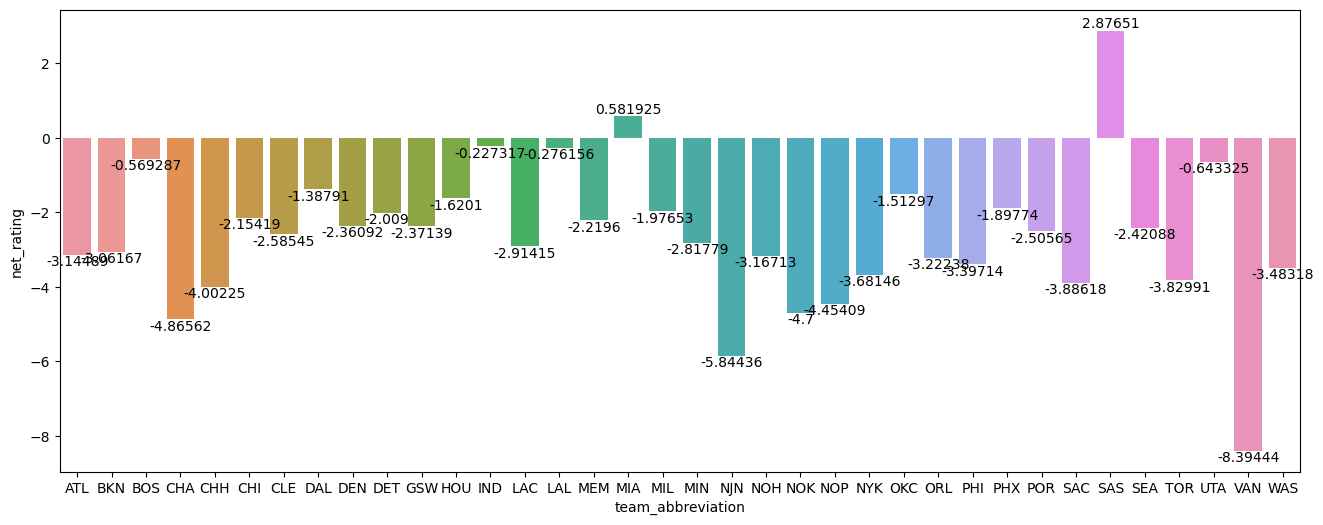

In [26]:
plt.figure(figsize=(16,6))
ax = sns.barplot(teams, x= teams.index,  y= 'net_rating' )
for i in ax.containers:
    ax.bar_label(i,)


Net rating of San antanio spurs is around 3. It is only Team that has that rating otherwise all the teams have negetive rating .

# Overall best offensive players ?

Based on assist and  points pergame

In [27]:
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [28]:
sum_off = nba.groupby('player_name').sum().sort_values('pts', ascending =False).iloc[0:10]

In [29]:
players = sum_off.index

In [30]:
for i in players:
    print(i)

LeBron James
Kobe Bryant
Dirk Nowitzki
Carmelo Anthony
Kevin Durant
Allen Iverson
Paul Pierce
Vince Carter
Tim Duncan
Dwyane Wade


In [31]:
sum_off.at['LeBron James', 'pts']

515.1

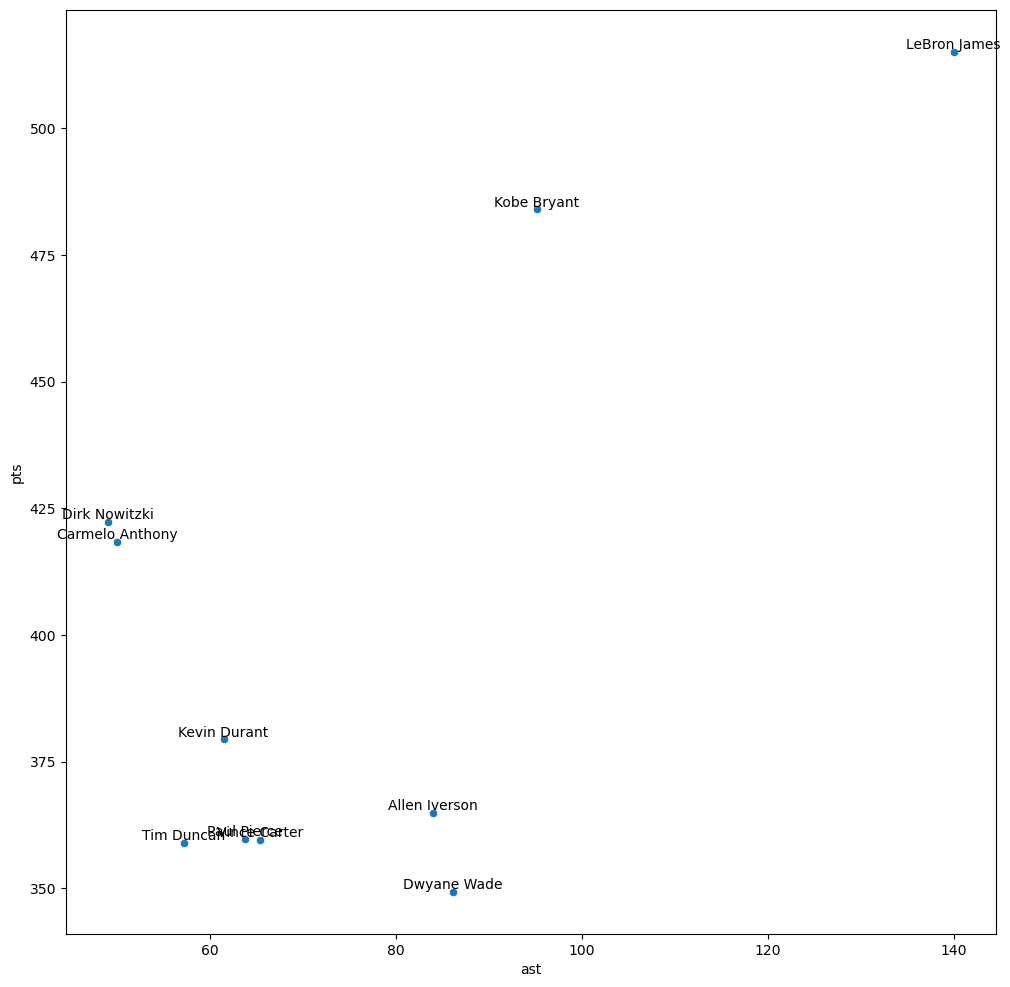

In [32]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(sum_off, x='ast',  y= 'pts' )

for i in players:
    plt.text(sum_off.at[i, 'ast'] , sum_off.at[i, 'pts'], i, va='bottom', ha='center')


Values are sum of ast and points per season

# Which player had highest shooting efficiency?

nba.value_counts().reset_index()Player should have played min. 4 seasons and having minimum of  25 games/season

In [33]:
 off = nba.value_counts().reset_index().groupby('player_name').sum()

In [34]:
off.columns

Index([          'age', 'player_height', 'player_weight',            'gp',
                 'pts',           'reb',           'ast',    'net_rating',
            'oreb_pct',      'dreb_pct',       'usg_pct',        'ts_pct',
             'ast_pct',               0],
      dtype='object')

In [35]:

off_plot = off.loc[off[0] > 3].sort_values(['ts_pct', 'ast_pct'], ascending = False).iloc[0:50]

In [36]:
players1 = off_plot.index

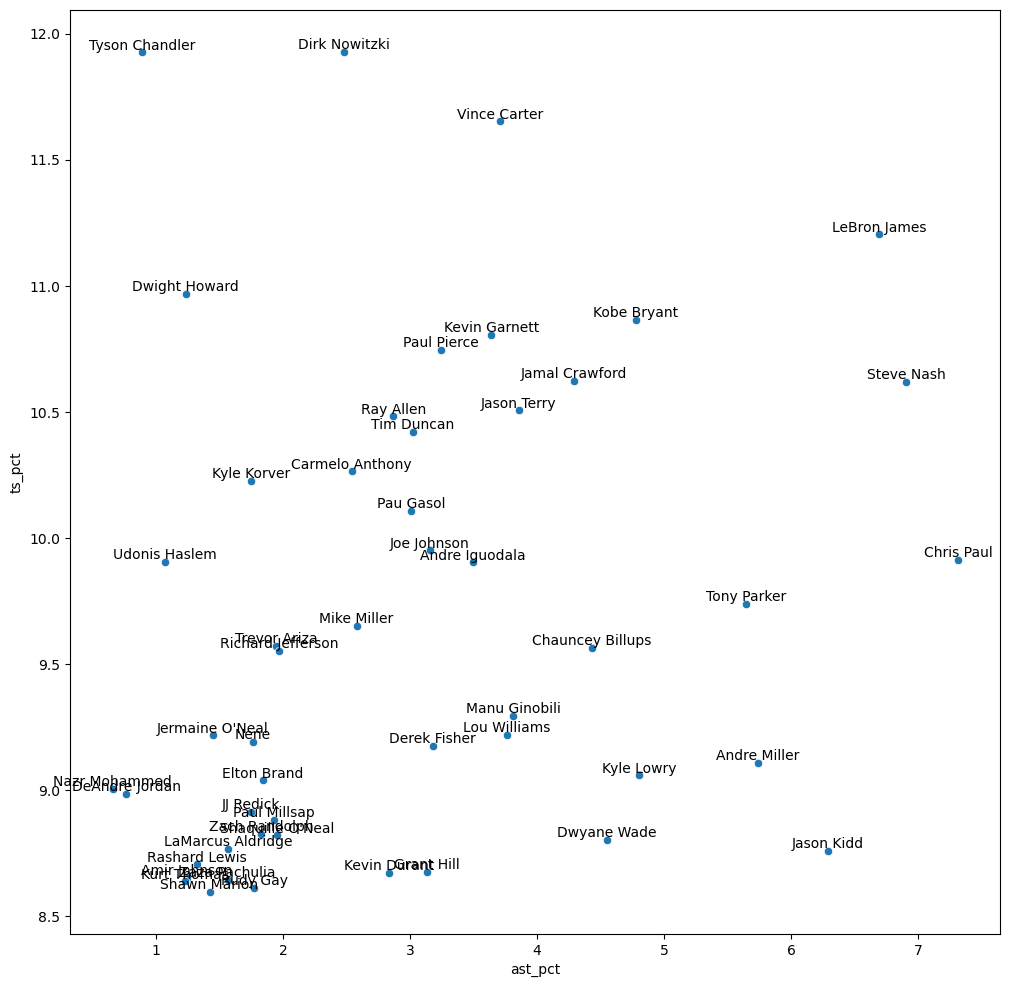

In [37]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(off_plot, x='ast_pct',  y= 'ts_pct' )

for i in players1:
    plt.text(off_plot.at[i, 'ast_pct'] , off_plot.at[i, 'ts_pct'], i, va='bottom', ha='center')

# Defensive player with respect to rebounds percentage

In [38]:
#played more than 25 games per season
nba2 = nba.loc[nba.gp > 25]

In [39]:
rebounding  = nba2 .groupby('player_name').mean().sort_values(['oreb_pct' ,'dreb_pct'], ascending = False).iloc[0:50]

In [40]:
players2 = rebounding.index

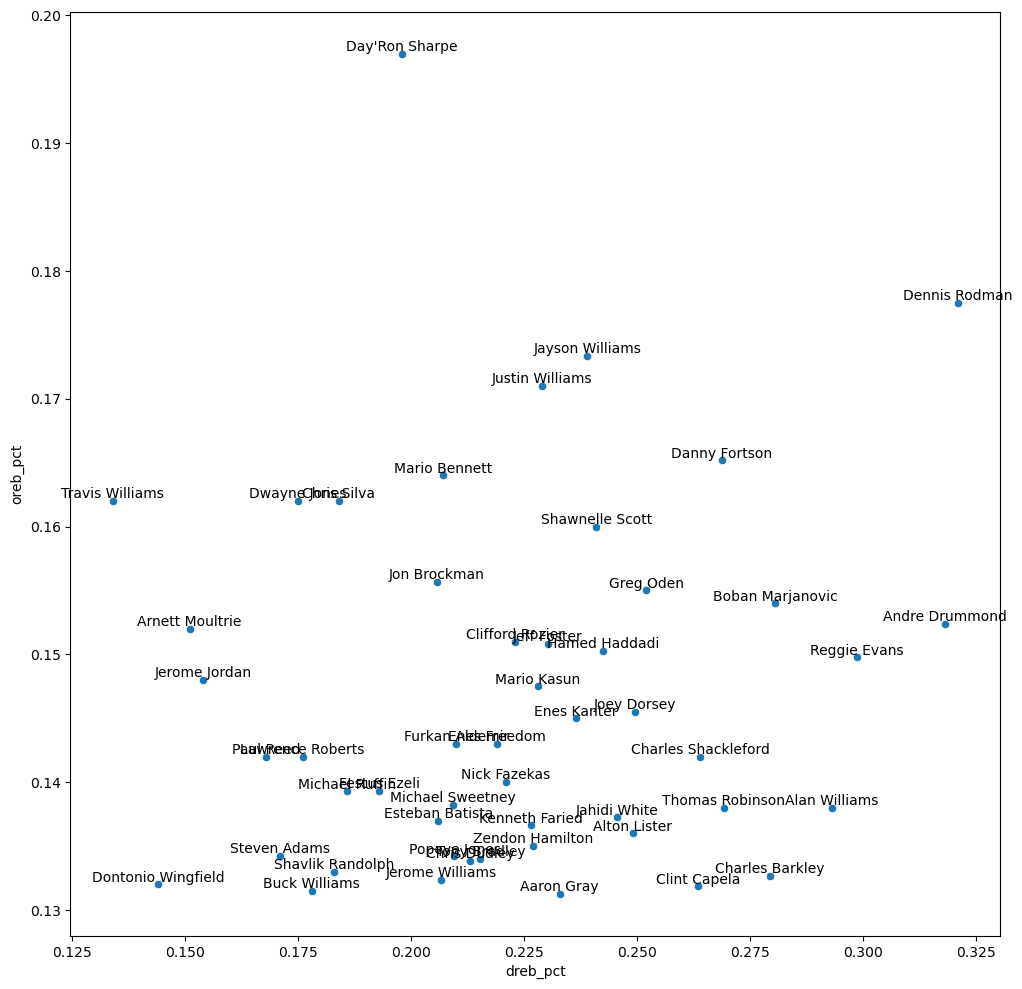

In [41]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(rebounding, x='dreb_pct',  y= 'oreb_pct' )

for i in players2:
    plt.text(rebounding.at[i, 'dreb_pct'] , rebounding.at[i, 'oreb_pct'], i, va='bottom', ha='center')

# How did NBA changed over time (Trend in Points, assist and rebounds per game)?

In [42]:
Trend = nba.groupby('season').sum()

In [43]:
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [44]:
overall = nba.groupby('season').sum()

In [45]:
overall.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
season,,,,,,,,,,,,,
1996-97,12332.0,88638.72,44332.085232,23757,3539.5,1564.0,803.1,-966.4,28.270,60.209,82.018,222.796,58.641
1997-98,12329.0,88071.96,44016.567680,24001,3489.0,1543.7,798.9,-1002.2,28.323,58.317,83.149,218.007,59.330
1998-99,12293.0,88196.42,44180.767984,14915,3230.4,1502.0,726.0,-1190.0,28.376,57.785,84.568,211.074,58.051
1999-00,12311.0,88003.38,44122.254616,24291,3497.8,1599.6,810.9,-954.1,26.575,61.919,81.158,216.669,58.852
2000-01,12391.0,88531.70,44471.520456,23971,3444.8,1596.0,804.2,-937.0,26.197,61.984,81.202,215.529,59.805


In [46]:
overall.pts

season
1996-97    3539.5
1997-98    3489.0
1998-99    3230.4
1999-00    3497.8
2000-01    3444.8
2001-02    3512.4
2002-03    3359.5
2003-04    3423.5
2004-05    3752.9
2005-06    3656.0
2006-07    3759.6
2007-08    3728.5
2008-09    3784.2
2009-10    3788.7
2010-11    3709.2
2011-12    3790.0
2012-13    3732.3
2013-14    3899.5
2014-15    3996.3
2015-16    3974.3
2016-17    4095.4
2017-18    4406.6
2018-19    4565.2
2019-20    4616.3
2020-21    4828.9
2021-22    4985.2
Name: pts, dtype: float64

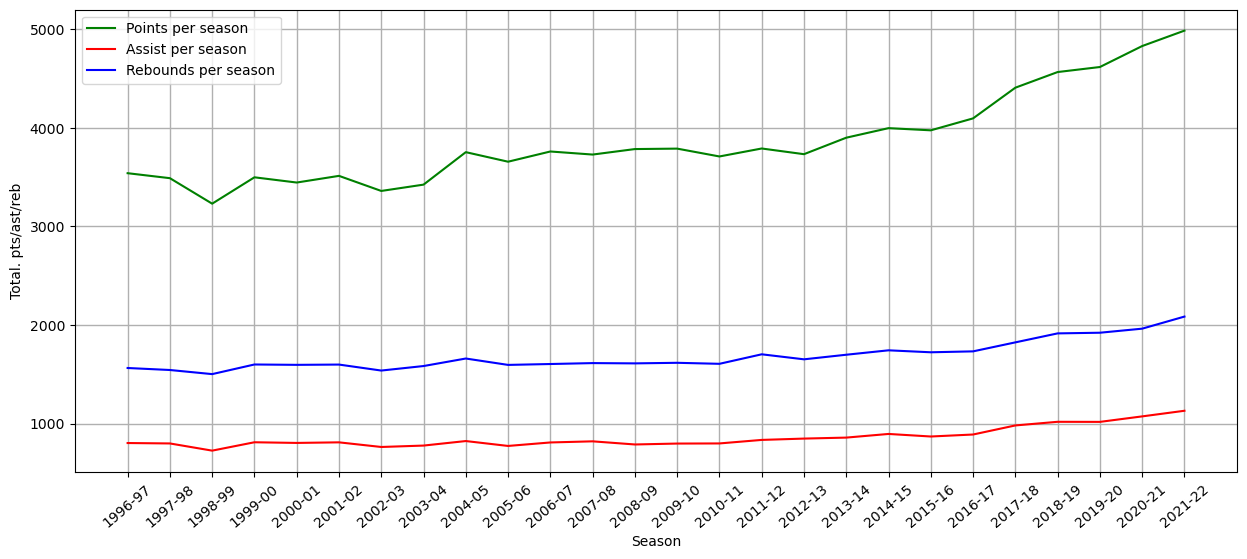

In [47]:
plt.figure(figsize = (15,6))
plt.plot(overall.index, overall.pts , color ='green', label='Points per season')
plt.plot(overall.index, overall.ast , color ='red', label = 'Assist per season')
plt.plot(overall.index, overall.reb , color ='blue', label = 'Rebounds per season')
plt.xticks(rotation = 40)
plt.grid(linewidth = 1)
plt.xlabel('Season')
plt.ylabel('Total. pts/ast/reb')
plt.legend(loc='best')
plt.show()

****From the above plot we can conclude that there is so significant change in assist and rebounds per season. Which is constant throught out seasons with small changes here and there.
<br> But points per season has drastically increased over the seasons. I think this is because of drastically increase in 3pt shot atempts.
And also game being less physical now****